In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,accuracy_score,roc_curve,roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas_profiling import ProfileReport
from patsy import dmatrices
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
dta = sm.datasets.fair.load_pandas().data
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [3]:
dta['affairs'] = (dta.affairs > 0).astype(int)

In [4]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


In [5]:
set(dta['educ'])

{9.0, 12.0, 14.0, 16.0, 17.0, 20.0}

In [6]:
dta.dtypes

rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs              int64
dtype: object

In [7]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0


In [8]:
set(dta.age)

{17.5, 22.0, 27.0, 32.0, 37.0, 42.0}

In [9]:
ProfileReport(dta)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

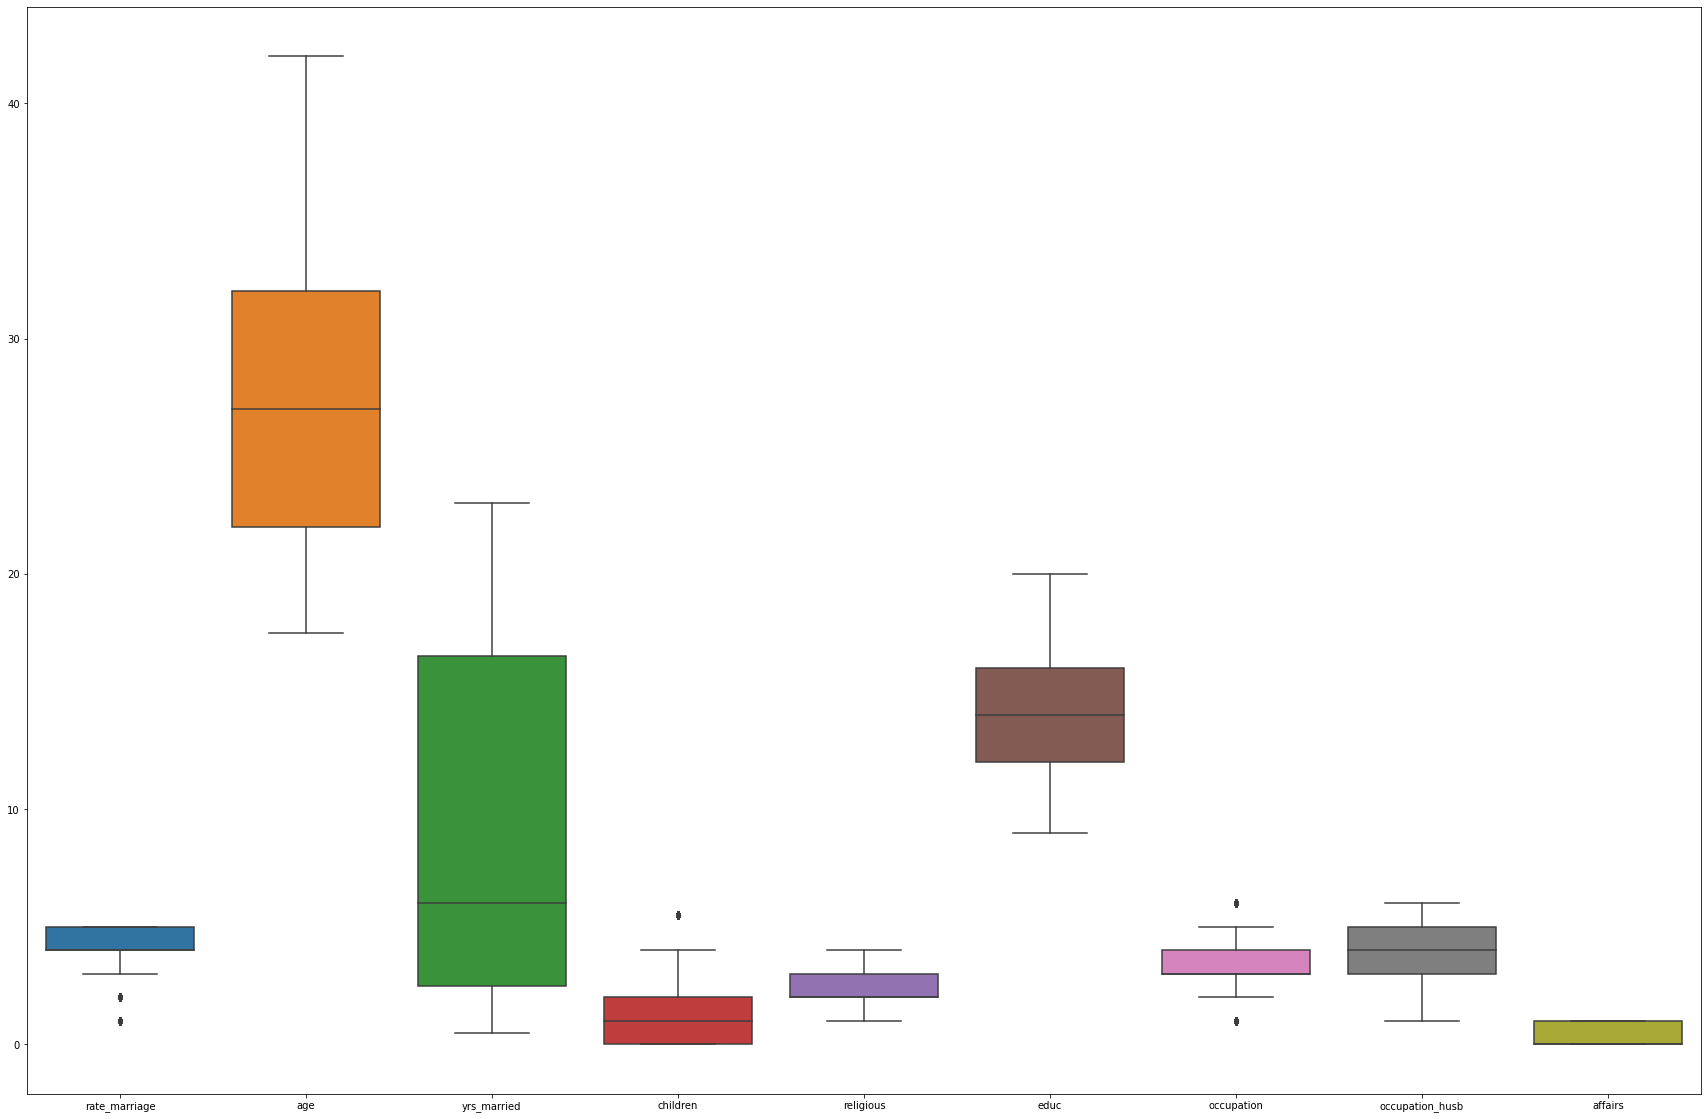

In [10]:
fig,ax=plt.subplots(figsize=(30,20))
sns.boxplot(data=dta,ax = ax)

In [11]:
x = dta.drop(columns='affairs')
x

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0
...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0


In [12]:
y = dta['affairs']
y

0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: affairs, Length: 6366, dtype: int64

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=100,test_size=.25)

In [14]:
x_train

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
5325,4.0,42.0,23.0,4.0,4.0,14.0,4.0,4.0
5839,5.0,22.0,2.5,0.0,2.0,14.0,3.0,4.0
2333,5.0,22.0,2.5,0.0,4.0,16.0,4.0,5.0
5964,3.0,22.0,2.5,0.0,3.0,14.0,4.0,5.0
511,4.0,37.0,13.0,1.0,1.0,12.0,5.0,5.0
...,...,...,...,...,...,...,...,...
6026,4.0,32.0,13.0,2.0,2.0,12.0,2.0,5.0
79,2.0,22.0,6.0,2.0,2.0,14.0,2.0,5.0
3927,5.0,22.0,2.5,1.0,3.0,16.0,4.0,4.0
5955,4.0,22.0,0.5,0.0,2.0,14.0,4.0,5.0


In [15]:
x_test

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
2757,5.0,27.0,2.5,0.0,3.0,16.0,4.0,6.0
5397,4.0,22.0,2.5,0.0,3.0,16.0,4.0,3.0
1911,5.0,32.0,13.0,1.0,1.0,20.0,2.0,6.0
5522,2.0,32.0,16.5,3.0,4.0,12.0,5.0,5.0
4884,5.0,27.0,9.0,3.0,3.0,14.0,3.0,2.0
...,...,...,...,...,...,...,...,...
4437,4.0,22.0,2.5,0.0,3.0,14.0,5.0,1.0
4738,4.0,32.0,16.5,2.0,3.0,12.0,3.0,2.0
6238,5.0,37.0,16.5,3.0,2.0,14.0,3.0,3.0
2203,5.0,27.0,2.5,0.0,1.0,16.0,4.0,4.0


In [16]:
scalar = StandardScaler()
scalar.fit(x_train)
pickle.dump(scalar,open('scaler_trans.pkl','wb'))

In [17]:
x_train_scaled = scalar.transform(x_train)
x_train_scaled

array([[-0.1080323 ,  1.86449387,  1.90629466, ..., -0.09478051,
         0.60753473,  0.11703008],
       [ 0.92968637, -1.03398827, -0.89088272, ..., -0.09478051,
        -0.45448314,  0.11703008],
       [ 0.92968637, -1.03398827, -0.89088272, ...,  0.82489864,
         0.60753473,  0.85801361],
       ...,
       [ 0.92968637, -1.03398827, -0.89088272, ...,  0.82489864,
         0.60753473,  0.11703008],
       [-0.1080323 , -1.03398827, -1.16377807, ..., -0.09478051,
         0.60753473,  0.85801361],
       [-0.1080323 ,  1.86449387,  1.90629466, ..., -1.01445966,
        -0.45448314,  0.11703008]])

In [18]:
vif_df = pd.DataFrame()

In [19]:
vif_df['vif'] = [variance_inflation_factor(x_train_scaled,i) for i in range(x_train_scaled.shape[1])]

In [20]:
vif_df['feature']  = x.columns
vif_df

,vif,feature
0,1.032297,rate_marriage
1,5.506724,age
2,7.149157,yrs_married
3,2.525883,children
4,1.031946,religious
5,1.282051,educ
6,1.203560,occupation
7,1.076808,occupation_husb


In [21]:
logi = LogisticRegression(multi_class='ovr')
logi.fit(x_train_scaled,y_train)

LogisticRegression(multi_class='ovr')

In [22]:
pickle.dump(logi,open('model.pkl','wb'))

In [23]:
logi.score(x_train_scaled,y_train)

0.7237117720988688

In [24]:
sca = StandardScaler()
x_test_scaled = sca.fit_transform(x_test)
x_test_scaled

array([[ 0.91564713, -0.28836587, -0.90475254, ...,  0.81330488,
         0.62189455,  1.59066963],
       [-0.13231134, -1.03641615, -0.90475254, ...,  0.81330488,
         0.62189455, -0.654318  ],
       [ 0.91564713,  0.45968442,  0.56801438, ...,  2.64209213,
        -1.49587256,  1.59066963],
       ...,
       [ 0.91564713,  1.2077347 ,  1.05893669, ..., -0.10108874,
        -0.43698901, -0.654318  ],
       [ 0.91564713, -0.28836587, -0.90475254, ...,  0.81330488,
         0.62189455,  0.09401121],
       [-1.18026981,  1.95578498,  1.97064954, ..., -1.01548236,
        -1.49587256, -1.40264721]])

In [25]:
pred = logi.predict(x_test_scaled)
pred

array([0, 0, 0, ..., 0, 0, 1])

In [26]:
pred_proba = logi.predict_proba(x_test_scaled)

In [27]:
pred_proba[:,1]

array([0.09821654, 0.22697388, 0.26030669, ..., 0.25397722, 0.18095474,
       0.65724217])

In [28]:
logi.score(x_test_scaled,y_test)

0.717964824120603

In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.74      0.91      0.81      1070
           1       0.63      0.33      0.44       522

    accuracy                           0.72      1592
   macro avg       0.68      0.62      0.62      1592
weighted avg       0.70      0.72      0.69      1592



In [30]:
accuracy_score(y_test,pred)

0.717964824120603

In [31]:
roc_auc_score(y_test,pred)

0.6194704049844236

In [32]:
confusion_matrix(y_test,pred)

array([[969, 101],
       [348, 174]])

In [33]:
scores = cross_val_score(logi, x_train_scaled, y_train, scoring='accuracy', cv=10,n_jobs=-1,verbose=3)
scores

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


array([0.72594142, 0.71129707, 0.72803347, 0.75523013, 0.6918239 ,
       0.73165618, 0.75262055, 0.72536688, 0.71698113, 0.70859539])

In [34]:
scores.mean()

0.7247546117207442

In [35]:
auc = roc_auc_score(y_test,pred_proba[:,1],multi_class="ovr")
auc

0.7475131593081964

In [36]:
fpr,tpr,threshlds = roc_curve(y_test,pred_proba[:,1]) 

In [37]:
print(fpr,"\n",tpr,"\n",threshlds,"\n")

[0.00000000e+00 0.00000000e+00 0.00000000e+00 9.34579439e-04
 9.34579439e-04 1.86915888e-03 1.86915888e-03 2.80373832e-03
 2.80373832e-03 4.67289720e-03 4.67289720e-03 5.60747664e-03
 5.60747664e-03 6.54205607e-03 6.54205607e-03 7.47663551e-03
 7.47663551e-03 8.41121495e-03 8.41121495e-03 9.34579439e-03
 9.34579439e-03 1.02803738e-02 1.02803738e-02 1.21495327e-02
 1.21495327e-02 1.30841121e-02 1.30841121e-02 1.58878505e-02
 1.58878505e-02 1.58878505e-02 1.68224299e-02 1.68224299e-02
 1.77570093e-02 1.77570093e-02 1.86915888e-02 1.86915888e-02
 1.96261682e-02 1.96261682e-02 2.33644860e-02 2.33644860e-02
 2.42990654e-02 2.42990654e-02 2.52336449e-02 2.52336449e-02
 2.61682243e-02 2.61682243e-02 2.71028037e-02 2.71028037e-02
 2.80373832e-02 2.80373832e-02 2.80373832e-02 2.80373832e-02
 3.08411215e-02 3.08411215e-02 3.17757009e-02 3.17757009e-02
 3.36448598e-02 3.36448598e-02 3.55140187e-02 3.55140187e-02
 3.64485981e-02 3.64485981e-02 3.73831776e-02 3.73831776e-02
 3.83177570e-02 3.831775

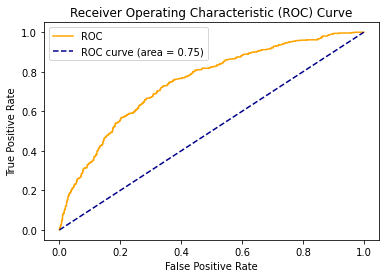

In [38]:
%matplotlib inline
plt.plot(fpr,tpr,color="orange",label = "ROC")
plt.plot([0,1],[0,1],color = "darkblue",linestyle="--",label = "ROC curve (area = %0.2f)"%auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

In [39]:
saved_model = pickle.load(open('model.pkl','rb'))

In [40]:
saved_model.predict(x_test_scaled)

array([0, 0, 0, ..., 0, 0, 1])

In [41]:
saved_model.predict([x_test_scaled[0]])

array([0])

In [42]:
dta.iloc[2757]

rate_marriage       5.0
age                27.0
yrs_married         2.5
children            0.0
religious           3.0
educ               16.0
occupation          4.0
occupation_husb     6.0
affairs             0.0
Name: 2757, dtype: float64

In [43]:
saved_scaler = pickle.load(open('scaler_trans.pkl','rb'))

In [44]:
saved_model.predict(saved_scaler.transform([x_test.iloc[1]]))

/home/swapnil/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [45]:
saved_scaler.transform([x.iloc[0]])

/home/swapnil/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.14575096,  0.4152528 , -0.00397282,  1.10988403,  0.65925001,
         1.28473822, -1.51650102,  0.85801361]])

In [46]:
saved_model.predict(saved_scaler.transform([x.iloc[1]]))

/home/swapnil/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [49]:
x.iloc[1]

rate_marriage       3.0
age                27.0
yrs_married        13.0
children            3.0
religious           1.0
educ               14.0
occupation          3.0
occupation_husb     4.0
Name: 1, dtype: float64

In [48]:
saved_model.predict(saved_scaler.transform([x.iloc[0]]))

/home/swapnil/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])